# Confusion Matrix

 ## Libraries

In [22]:
#general use and reading in the data
import os
import numpy as np
import pandas as pd

#Viz
import matplotlib.pyplot as plt
import seaborn as sns

#transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

## 1. Reading in the data
## 2. Features and target selection

In [4]:
pwd = os.getcwd()
data = os.path.join(pwd, "data.csv")
df = pd.read_csv(data)
#sanity check:
#df.head()

features = df[["Pclass", "Sex", "Fare"]]
target = df[["Survived"]]

In [8]:
target_dist = target.value_counts(normalize=True)

Survived
0           0.616162
1           0.383838
dtype: float64

Text(0.5, 1.0, 'target distribution')

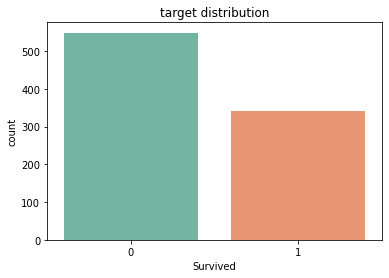

In [21]:
sns.countplot(x="Survived", data=df,  palette="Set2")
plt.title("target distribution")

## 3. Transformer

In [23]:
ct = ColumnTransformer([
    ("onhot", OneHotEncoder(sparse=False), ["Pclass", "Sex"]),
    ("scaling", StandardScaler(),["Fare"])
])

features_fit_trans = ct.fit_transform(features)
# #sanity check:
# features_fit_trans